In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import torch.optim as optim 
import math
import matplotlib.pyplot as plt
import matplotlib
from junctionart.roundabout.RoundaboutLaneEncodingEnv import RoundaboutLaneEncodingEnv
from junctionart.roundabout.GFNAgent2 import GFNAgent2
from junctionart.roundabout.FlowFunction import FlowFunction as FF
from tqdm import tqdm

# device = torch.device("mps")
N_values=30
vector_Len=4
N_epsiodes= 8000
threePoints = [
            {"x": 80, "y": 20, "heading": math.radians(45),'leftLane': 1, 'rightLane': 1, 'medianType': None, 'skipEndpoint': None},
            {"x": 210, "y": 20, "heading": math.radians(115),'leftLane': 1, 'rightLane': 1, 'medianType': None, 'skipEndpoint': None},
        ]
env = RoundaboutLaneEncodingEnv()

agent=GFNAgent2(generatorEnv=env, roadDefinitions = threePoints, vector_Len=vector_Len,N_values=N_values,batch_size=16)

Fnet=FF(state_dim=vector_Len, n_embed=vector_Len*N_values)
# Fnet.to(device)

ff = FF(state_dim = 4, n_embed = vector_Len*N_values)
agent.reset()

optimizer = optim.Adam(Fnet.parameters(), lr=1e-4)


Match_loss_all=[]
AllRewards=[]
AllStates=[]
temp_start = 100
for Episode in tqdm(range(N_epsiodes)):
    # print("episode",Episode)
    temp = 1 if temp_start - (Episode)/10 < 1 else temp_start - (Episode)/10
    agent.reset()
    #####forward, build the trajectory
    for step in range(vector_Len):
        states, rewards=agent.step_forward(Fnet, temp)

    AllStates.append(states)
    #####calculate rewards
    AllRewards.append(rewards.mean().item())

    #####calculate flow match loss
    optimizer.zero_grad()

    Match_loss=agent.CalculateFlowMatchingLoss(Fnet, rewards)
    Match_loss_all.append(Match_loss.item())

    Match_loss.backward()

    optimizer.step()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8000/8000 [11:45:10<00:00,  5.29s/it]


tensor([[25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3],
        [25, 22,  6,  3]])

### prunning and smoothing


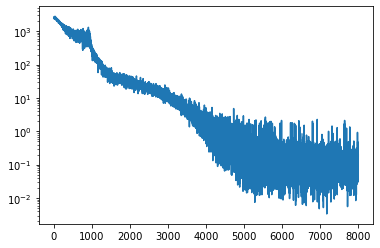

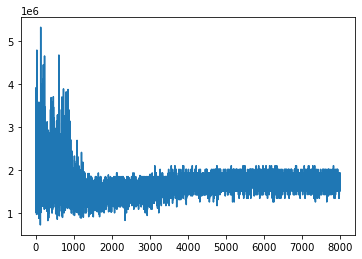

In [6]:
plt.plot(Match_loss_all)
plt.yscale('log')
plt.show()
plt.plot(AllRewards)
# plt.yscale('log')
plt.show()

### Pruning, but no smoothing

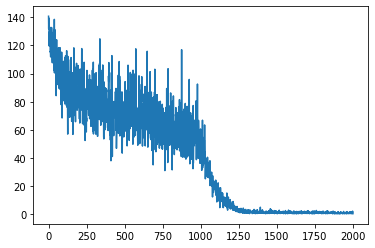

In [24]:
plt.plot(Match_loss_all)
# plt.yscale('log')
plt.show()

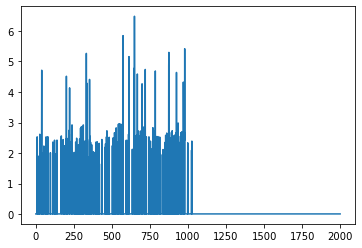

In [27]:
plt.plot(AllRewards)
# plt.yscale('log')
plt.show()

###  Trying 2000 eps

In [1]:
### import torch
import numpy as np
import torch.optim as optim 
import math
import matplotlib.pyplot as plt
import matplotlib
from junctionart.roundabout.RoundaboutLaneEncodingEnv import RoundaboutLaneEncodingEnv
from junctionart.roundabout.GFNAgent2 import GFNAgent2
from junctionart.roundabout.FlowFunction import FlowFunction as FF
from tqdm import tqdm

# device = torch.device("mps")
N_values=30
vector_Len=4
N_epsiodes= 2000
threePoints = [
            {"x": 80, "y": 20, "heading": math.radians(45),'leftLane': 1, 'rightLane': 1, 'medianType': None, 'skipEndpoint': None},
            {"x": 210, "y": 20, "heading": math.radians(115),'leftLane': 1, 'rightLane': 1, 'medianType': None, 'skipEndpoint': None},
        ]
env = RoundaboutLaneEncodingEnv()

agent=GFNAgent2(generatorEnv=env, roadDefinitions = threePoints, vector_Len=vector_Len,N_values=N_values,batch_size=8)

Fnet=FF(state_dim=vector_Len, n_embed=vector_Len*N_values)

agent.reset()

optimizer = optim.Adam(Fnet.parameters(), lr=1e-4)


Match_loss_all=[]
AllRewards=[]
temp_start = 100
for Episode in tqdm(range(N_epsiodes)):
    # print("episode",Episode)
    temp = 1 if temp_start - (Episode)/10 < 1 else temp_start - (Episode)/10
    agent.reset()
    #####forward, build the trajectory
    for step in range(vector_Len):
        states, rewards=agent.step_forward(Fnet, temp)

    #####calculate rewards
    AllRewards.append(rewards.mean().item())

    #####calculate flow match loss
    optimizer.zero_grad()

    Match_loss=agent.CalculateFlowMatchingLoss(Fnet)
    Match_loss_all.append(Match_loss.item())

    Match_loss.backward()

    optimizer.step()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [1:38:50<00:00,  2.97s/it]


In [14]:
plt.plot(torch.arange(N_epsiodes), Match_loss_all)
# plt.yscale('log')
plt.show()

NameError: name 'torch' is not defined

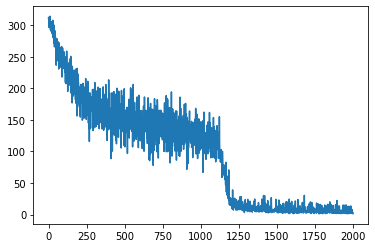

In [15]:
import torch
plt.plot(torch.arange(N_epsiodes), Match_loss_all)
# plt.yscale('log')
plt.show()

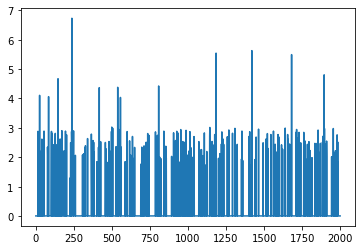

In [16]:
plt.plot(torch.arange(N_epsiodes), AllRewards)
# plt.yscale('log')
plt.show()

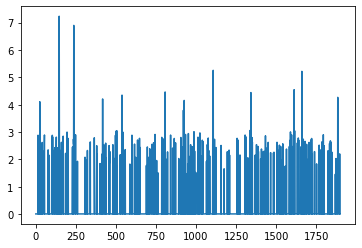

In [6]:
plt.plot(torch.arange(N_epsiodes), AllRewards)
# plt.yscale('log')
plt.show()

In [4]:
from junctionart.roundabout.FlowFunction import FlowFunction
import torch
Fnet=FlowFunction(state_dim=3, n_embed=12)

states=torch.zeros((2,3))
actions=torch.tensor([[0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0]])

output=Fnet.forward(states,actions)

print("output")
print(output)

output
tensor([[-0.1071],
        [-0.3641]], grad_fn=<AddmmBackward0>)
